# Exercise 1.10

For any given constant $\epsilon>0$, find the solution of the Cauchy problem
$$
    \large u_t = \epsilon u_{xx}, \ x\in\mathbb{R}, \ t>0,
$$
with initial condition
$$
    \large u(x,0) = \begin{cases}
                        0, & x\leq 0, \\
                        1, & x>0.
                    \end{cases}
$$
Use the solution formula to plot the solution at $t=1$ for $x\in[-1,1]$ using $\epsilon=1/10, 1/2, 1, 10$. 

## Using the same parameterization/characterization methods as the text to derive w(y)
$$
\large v(x,t) = u(cx,c^2t)\\
\large v_{t} = c^2u_{t}\\
\large v_{xx} = c^2u_{xx}\\
\large v_{t} = \epsilon v_{xx}
$$
## As stated in the text, the solution u(x,t) must stay constant for any choice of c. So u(x,t) is constant for the following lines:
$$
\frac{x}{\sqrt{t}} = Constant.
$$
## Let $y=\frac{x}{\sqrt{t}}$, and substitute this into a new function $w(y)=u(x,t)$.
## This change of variable makes the system an ODE dependent on one variable, which even a math major can solve.
## Plug w(y) = u(x,t) into the heat equation to derive our new ODE.
$$
\large \frac{\partial w}{\partial t} = \frac{\partial w}{\partial y}\frac{\partial y}{\partial t}\\
\large \frac{\partial w}{\partial t} = -\frac{1}{2}t^{-1}y w'(y)\\
\large \frac{\partial w}{\partial x}= \frac{\partial w}{\partial y}\frac{\partial y}{\partial x}\\
\large \frac{\partial w}{\partial x} = \frac{1}{\sqrt{t}}w'(y)\\
\large \frac{\partial^2 w}{\partial x^2}=t^{-1}w''(y)\\
$$
## Substituting into the heat equation:
$$
\frac{y}{2\epsilon}w'(y) + \epsilon w''(y) = 0\\
\frac{y}{2\epsilon}w'(y) + w''(y) = 0
$$
## Evaluate the integrating factor:
$$
e^{\int\frac{y}{2\epsilon}dy} = e^{\frac{y^2}{4 \epsilon}}
$$
## Multiple by the ODE, and then condense:
$$
\frac{y}{2\epsilon}e^{\frac{y^2}{4\epsilon}}w'(y) + e^{\frac{y^2}{4\epsilon}}w''(y) = 0\\
\frac{\partial}{\partial y}(e^{\frac{y^2}{4\epsilon}}w'(y))=0,
$$
## which is the original outcome, but with $\epsilon$ in the denominator of $y^2$.
## Solve this ODE.

$$
\large e^{\frac{y^2}{4\epsilon}}w'(y) = constant\\
\large w'(y) = Ce^{\frac{-y^2}{4\epsilon}}\\
\large w(y) = \int_{-\infty}^{y}Ce^{\frac{-z^2}{4\epsilon}}dz\\
\large a^2 = \frac{y^2}{4\epsilon};\qquad a = \frac{y}{ 2\sqrt{\epsilon}};\qquad
\large a = \frac{dy}{2\sqrt{ \epsilon}}
$$
## This leads us to the following solution:
$$
\large u(x,t)  = 2C\sqrt{ \epsilon}\int_{-\infty}^{\frac{x}{2\sqrt{t\epsilon}}}e^{-a^2}da
$$
## Going through the steps of solving the Gaussian integral, and applying the boundary condition, yields the normalization constant :
$$\large C = \frac{1}{2\sqrt{\epsilon  \pi}}\\
\large u(x,t)  = 2C \epsilon\sqrt{\int_{-\infty}^{\frac{x}{2\sqrt{t\epsilon}}}e^{-(a^2)^2 }da^2}\\
\large u(x,t)  = 2C \epsilon\sqrt{\int_{-\infty}^{\frac{x}{2\sqrt{t\epsilon}}}e^{-(2a^2) }dada}\\
$$
## Well a is just a dummy variable, so just split up the $2a^2$ into a^2 + b^2, and change the single integral into a double integral:
$$
\large u(x,t)  = 2C \epsilon\sqrt{\int_{-\infty}^{\frac{x}{2\sqrt{t\epsilon}}}\int_{-\infty}^{\frac{x}{2\sqrt{t\epsilon}}}e^{-(a^2+b^2) }dadb}\\
$$
## Convert to polar coordinates: 
$$a^2+b^2=r^2\qquad dadb = rdrd\theta\\
u(x,t)  = 2C \epsilon\sqrt{\int_{0}^{\infty}\int_{0}^{2\pi}e^{-(r^2) }rdrd\theta}\\
$$
## v substitution yields:
$$
v = -r^2;\qquad dr = -\frac{du}{2}
u(\infty,t) =  2C \epsilon\sqrt{\int_{0}^{R}\int_{0}^{2\pi}\frac{-e^{(v) }}{2}dvd\theta}\\
$$
## Applying the boundary conditions at $x= r =\infty$:
$$
u(\infty,t) = 1 =  2C \epsilon\sqrt{\int_{0}^{\infty}\int_{0}^{2\pi}\frac{-e^{(v) }}{2}dvd\theta}\\
$$
## Solving for the normalization constant:
$$
1 = 2C\epsilon\sqrt{pi}\\
C = \frac{1}{1\epsilon\sqrt{\pi}}
$$

## So the solution to the heat equation is:
$$
\large u(x,t) = \frac{1}{\sqrt{\pi}}\int_{-\infty}^{\frac{x}{2\sqrt{t\epsilon}}}e^{-a^2}da
$$


## Numerical evaluation and plots of the solution

We use the error function (see https://en.wikipedia.org/wiki/Error_function for more details), commonly denoted by $erf$, that is available as the `erf` function within `scipy.special` (see https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.erf.html)to plot the solution below. 
First, we import all the necessary packages in the code block below.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy.special import erf 

To understand how the `erf` function works, we first recreate Figure 1.6 from the text that is of Eq. (1.55) where
$$
    \large u(x,t) = \frac{1}{\sqrt{\pi}} \int_{-\infty}^{x/(2\sqrt{t})} e^{-\theta^2}\, d\theta
$$
at $t=0, 0.25,$ and $1$ for $x\in[-2,2]$. 
Since 
$$
    \large erf(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-\theta^2}\, d\theta, 
$$
and $u(0,t)=\frac{1}{2}$ for all $t>0$ (this can be seen by Exercise 1.11(b) and exploiting symmetry), we see that we can rewrite $u(x,t)$ in Eq. (1.55) as
$$
    \large u(x,t) = \frac{1}{2} \left[1+erf(x/(2\sqrt{t}))\right].
$$

C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in divide


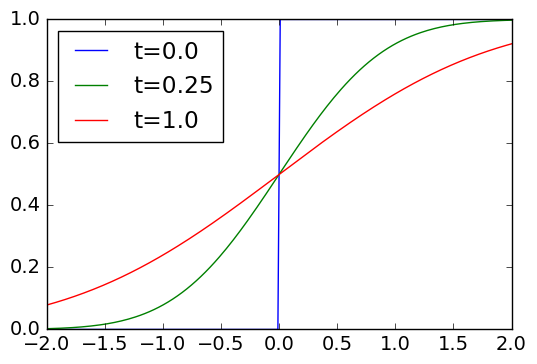

In [4]:
# Recreation of Figure 1.6 in text

x = np.linspace(-2,2,200)
times = np.array([0, 0.25, 1])

for t in times:
    u = 1./2 *(1+erf(x/(2*np.sqrt(t))))
    plt.plot(x, u, label='t='+str(t))

plt.legend(loc='upper left')

We now plot the solution at $t=1$ for $x\in[-1,1]$ using $\epsilon=1/10, 1/2, 1, 10$. 

First, we rewrite our solution $u(x,t)$ in terms of the error function, so that
$$
    \large u(x,t) =  \frac{1}{\sqrt{\pi}}\int_{-\infty}^{\frac{x}{2\sqrt{t\epsilon}}}e^{-\theta^{2}}d\theta\\
    \large u(x,t) =  \frac{1}{2} \left[1+erf(x/(2\sqrt{\epsilon t}))\right].
$$

C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in divide


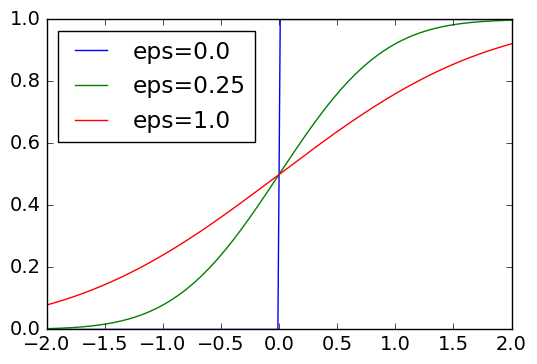

In [8]:
x = np.linspace(-2,2,200)
eps = np.array([0, 0.25, 1])

for e in eps:
    u = 1./2 *(1+erf(x/(2*np.sqrt(e))))
    plt.plot(x, u, label='eps='+str(e))

plt.legend(loc='upper left')

## So what is happening here? This graph looks identical to the original graph, so it appears as if increasing the $\epsilon$ has the same effect as waiting a longer time for the system to come to equilibrium. Well $\epsilon$ is the heat diffusion coefficient, so what this is  showing us is that a larger diffusion constant causes more heat to flow out in a unit amount of time than a smaller diffusion constant, thus accelerating  behavior of the system. Let's explore this behavior for other times and larger constants.

C:\Users\EvanD\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in divide


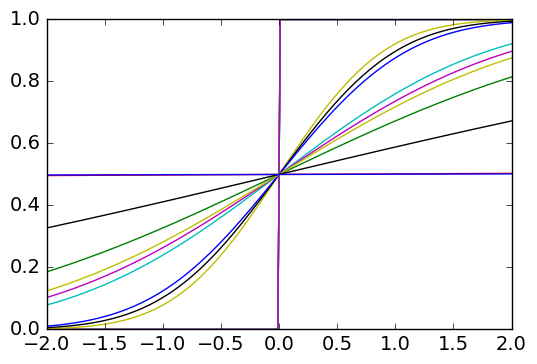

In [21]:
x = np.linspace(-2,2,200)
eps = np.array([0, 0.25, 1])
times = np.array([1,1.25,1.5,10,100000])
for e in eps:
    for t in times:
        u = 1./2 *(1+erf(x/(2*np.sqrt(t*e))))
        plt.plot(x, u, label='eps='+str(e))

#plt.legend(loc='upper left')

## Interestingly enough we see that for all space, $u(x,t) = \frac{1}{2}$ as $ t \to \infty, u(x,t) \to \frac{1}{2}$ for all x. 